In [1]:
'''
In above average stress group: Stress_score seems to predict feelin of tiredness /rested

Is it true at all?
'''

import pandas as pd
from utils import weekFromDate

# Stai file
stai = pd.read_csv('../dataset/stai.csv')

# Day file
day = pd.read_csv('../dataset/day.csv')

def filterDays(row, stai_row):
  week = weekFromDate(row['date'])
  id = row['id']
  stai_week = weekFromDate(stai_row['submitdate'])
  stai_id = stai_row['user_id']
  return week == stai_week and id == stai_id

# Calculate average stress score of the week and counting the amount of stressed / anxious emotions
for index, stai_row in stai.iterrows():
  # print(stai_row)

  this_day = day[day.apply(filterDays, axis=1, args=(stai_row,))]

  #Count averages and sums , doesnt work need to alter the original
  stai.at[ index, 'stress_score_avg' ] = this_day['stress_score'].mean()
  stai.at[ index, 'tense_count'] = this_day['TENSE/ANXIOUS'].sum()
  stai.at[ index, 'rested_count'] = this_day['RESTED/RELAXED'].sum()

#Show
stai



,Unnamed: 0.1,Unnamed: 0,user_id,type,submitdate,stai_stress,stai_stress_category,stress_score_avg,tense_count,rested_count
0,0,0,1,stai,2021-05-31,45.0,Below average,80.285714,1.0,0.0
1,1,1,1,stai,2021-06-07,46.0,Average,74.333333,0.0,0.0
2,2,3,1,stai,2021-07-19,46.0,Average,74.142857,0.0,1.0
3,3,4,1,stai,2021-07-26,46.0,Average,80.571429,0.0,0.0
4,4,5,1,stai,2021-06-28,54.0,Above average,73.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
274,274,0,71,stai,2021-06-08,60.0,Above average,81.000000,0.0,0.0
275,275,1,71,stai,2021-07-06,60.0,Above average,64.857143,0.0,0.0
276,276,2,71,stai,2021-06-01,59.0,Above average,65.714286,0.0,0.0
277,277,3,71,stai,2021-06-22,60.0,Above average,79.428571,0.0,0.0


In [2]:

filtered_stai = stai.copy()

#Filter missing stress scores and values under 20
filtered_stai = filtered_stai.dropna(subset=['stress_score_avg'])
filtered_stai = filtered_stai[ filtered_stai['stress_score_avg'] > 20 ] #Outliers

#Filter to the stai groups
stai_groups = [
  ('Above average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Above average' ]),
  ('Average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Average' ]),
  ('Below average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Below average' ]),
]


Group: Above average
Avg stress_score all: 70.8483436853002
Tense ppl(n=7) avg stress_score: 72.42857142857143
Rested ppl(n=9) avg stress_score: 66.2063492063492

Group: Average
Avg stress_score all: 70.48481116584566
Tense ppl(n=4) avg stress_score: 73.58928571428571
Rested ppl(n=12) avg stress_score: 63.650396825396825

Group: Below average
Avg stress_score all: 64.43366174055829
Tense ppl(n=2) avg stress_score: 71.25714285714285
Rested ppl(n=8) avg stress_score: 46.863095238095234


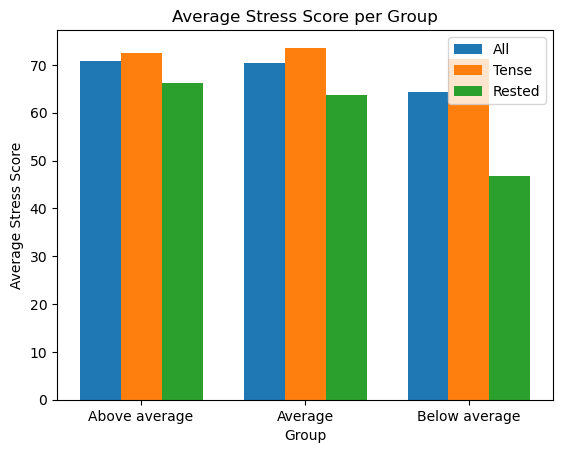

In [4]:
# Create the bar graph
import matplotlib.pyplot as plt
import numpy as np

group_names = []
stress_scores = []
tense_scores = []
rested_scores = []

bar_width = 0.25  # width of each bar

for i, (group_name, stai_group) in enumerate(stai_groups):
    group_names.append(group_name)
    stress_score_mean = stai_group['stress_score_avg'].mean()
    stress_scores.append(stress_score_mean)
  
    # Tense people = atleast 2 Tense reportings and atmost 1 rested
    tense = stai_group[(stai_group['tense_count'] >= 2) & (stai_group['rested_count'] < 2)]
    tense_avg_score = tense['stress_score_avg'].mean()
    tense_scores.append(tense_avg_score)

    # Rested people = atleast 2 rested reportings and atmost 1 tense
    rested = stai_group[(stai_group['rested_count'] >= 2) & (stai_group['tense_count'] < 2)]
    rested_avg_score = rested['stress_score_avg'].mean()
    rested_scores.append(rested_avg_score)

    print('\nGroup: ' + group_name)
    print('Avg stress_score all: ' + str(stress_score_mean))
    print('Tense ppl(n=' + str(tense.shape[0]) + ') avg stress_score: ' + str(tense_avg_score))
    print('Rested ppl(n=' + str(rested.shape[0]) + ') avg stress_score: ' + str(rested_avg_score))

# Adjust x-coordinates for each group
x = np.arange(len(group_names))

# Plot bar chart
plt.bar(x, stress_scores, width=bar_width, label='All')
plt.bar(x + bar_width, tense_scores, width=bar_width, label='Tense')
plt.bar(x + (2 * bar_width), rested_scores, width=bar_width, label='Rested')

plt.xlabel('Group')
plt.ylabel('Average Stress Score')
plt.title('Average Stress Score per Group')
plt.xticks(x + bar_width, group_names)
plt.legend()
plt.show()


Average stress score is mean of weekly averages with people who are in certain categories. The modeling doesn't take into account that experienced stress or physiological stress might corrallate better with next or previous week.

Tense people is counted with rule of atleast 2 tense reporting in a week and atmost 1 relaxed reporting
Relaxed people is counted with rule of atleast 2 relaxed reporting in a week and atmost 1 tense reporting

Unintivetely, the physiological recialiance to stress (fitbit stress score) seems to be higher in above average stress experiencing people.
Also, same seems to be true to people who report more of being tired thatn rested which is very suprising.